Project description: 
The ins and outs of airline prices need to be known for your clients. Ensuring that the best deals can be found for your clients and helping them understand how airline prices change based on different factors is the objective.

In [1]:
import os
print(os.getcwd())

C:\Users\Pedram


## Univariate Analysis

#### 1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? 

In [2]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
import statistics

In [3]:
flight = pd.read_csv('flight.csv') #import
print(flight.head()) #preliminary check

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


In [4]:
flight.info() #checking columns and null values
#0 null value detected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB


In [16]:
print(flight.coach_price)

0         338.820
1         472.655
2         351.960
3         387.835
4         374.735
           ...   
129775    383.240
129776    397.825
129777    380.980
129778    485.185
129779    446.395
Name: coach_price, Length: 129780, dtype: float64


In [5]:
# A fucntion to calculate a 5-number summary
from numpy import percentile

def calculate_five_number_summary(data_frame, column_name):
    # Extract the column data
    column_data = data_frame[column_name]

    # Calculate quartiles
    quartiles = np.percentile(column_data, [25, 50, 75])

    # Calculate min/max
    data_min, data_max = column_data.min(), column_data.max()

    # Print 5-number summary
    print('Min: %.3f' % data_min)
    print('Q1: %.3f' % quartiles[0])
    print('Median: %.3f' % quartiles[1])
    print('Q3: %.3f' % quartiles[2])
    print('Max: %.3f' % data_max)


In [39]:
calculate_five_number_summary(flight, 'coach_price')

Min: 44.415
Q1: 331.445
Median: 380.560
Q3: 426.676
Max: 593.635


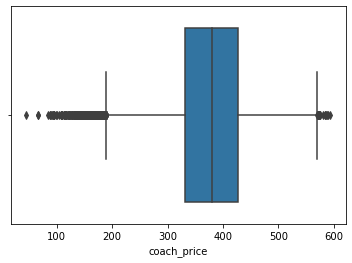

<Figure size 432x288 with 0 Axes>

In [20]:
#box plot
sns.boxplot(x='coach_price', data=flight)
plt.show()
plt.clf()

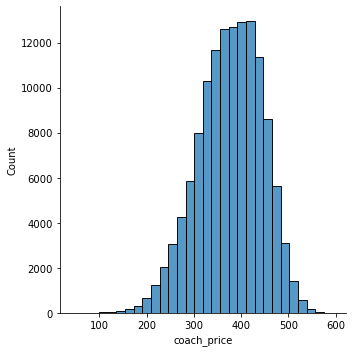

<Figure size 432x288 with 0 Axes>

In [23]:
#histogram
sns.displot(flight.coach_price, bins = 30, kde = False)
plt.show()
plt.clf()

#### 2. The coach ticket prices for flights that are 8 hours long are now being visualized. What are the high, low, and average prices for these 8-hour-long flights?

In [40]:
eight_hrs_flights = flight[flight['hours'] == 8]

#five num summary
calculate_five_number_summary(eight_hrs_flights, 'coach_price')

Min: 170.770
Q1: 390.266
Median: 437.115
Q3: 480.044
Max: 593.635


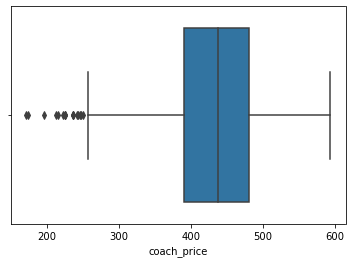

<Figure size 432x288 with 0 Axes>

In [29]:
#box plot
sns.boxplot(x='coach_price', data=eight_hrs_flights)
plt.show()
plt.clf()

#### 3. How is the distribution of flight delay times observed? The aim is to gain a better understanding of the frequency of significant delays to appropriately arrange connecting flights.

#### What types of delays are most common?

In [31]:
print(flight.delay)

0            0
1            0
2            0
3            0
4            0
          ... 
129775    1487
129776    1479
129777    1501
129778    1484
129779    1490
Name: delay, Length: 129780, dtype: int64


In [41]:
calculate_five_number_summary(flight, 'delay')

Min: 0.000
Q1: 9.000
Median: 10.000
Q3: 13.000
Max: 1560.000


In [43]:
mode_delay = statistics.mode(flight['delay'])
print('Mode for delays :', mode_delay)

Mode for delays : 10


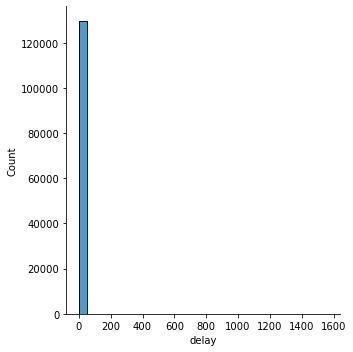

<Figure size 432x288 with 0 Axes>

In [30]:
#histogram
sns.displot(flight.delay, bins = 30, kde = False)
plt.show()
plt.clf()
# When plotting a histogram of flight delay times, there are difficulties in readability due to extreme outliers. To address this issue, I consider subsetting the data to include only flight delays at a lower and more reasonable value. This way, the distribution will be more visible and easier to interpret.

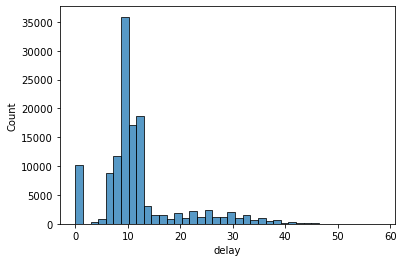

<Figure size 432x288 with 0 Axes>

In [36]:
sns.histplot(flight.delay[flight.delay <=500], bins = 40)
plt.show()
plt.clf()

After subsetting the data by delay times, we can see that a 10-minute delay is fairly common for this airline. You will want to keep that in consideration when setting up a connecting flight.

## Bivariate Analysis

#### 4. A visualization is to be created that shows the relationship between coach and first-class prices. The relationship between these two prices is to be analyzed.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


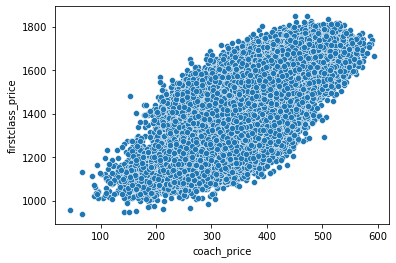

<Figure size 432x288 with 0 Axes>

In [44]:
#scatter plot
sns.scatterplot(flight.coach_price, flight.firstclass_price)
plt.show()
plt.clf()

#The plot indicates that there is a strong positive linear relationship between two variables

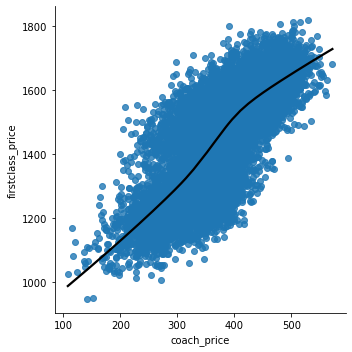

<Figure size 432x288 with 0 Axes>

In [47]:
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))
# taking a random sample from the data set to see what a less busy version of this plot may look like.
 
sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

#### 5.What is the relationship between coach prices and inflight features— inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

In [52]:
#checking the distinct values
print(np.unique(flight.inflight_meal))
print(np.unique(flight.inflight_entertainment))
print((np.unique(flight.inflight_wifi)))

['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


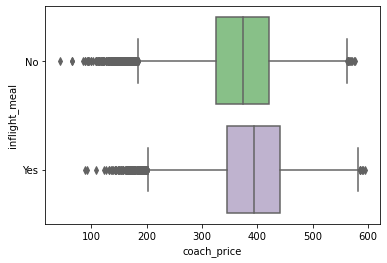

<Figure size 432x288 with 0 Axes>

In [53]:
#side-by-side box plot
#relationship between coach_price(quantitative) with inflight_meal(categorical)
sns.boxplot(x='coach_price', y='inflight_meal', data=flight, palette='Accent')
plt.show()
plt.clf()

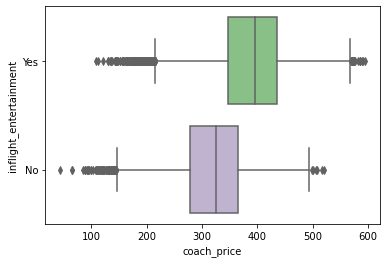

<Figure size 432x288 with 0 Axes>

In [54]:
#side-by-side box plot
#relationship between coach_price(quantitative) with inflight_entertainment(categorical)
sns.boxplot(x='coach_price', y='inflight_entertainment', data=flight, palette='Accent')
plt.show()
plt.clf()

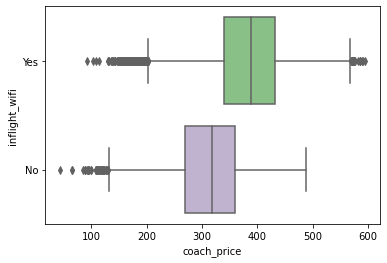

<Figure size 432x288 with 0 Axes>

In [55]:
#side-by-side box plot
#relationship between coach_price(quantitative) with inflight_wifi(categorical)
sns.boxplot(x='coach_price', y='inflight_wifi', data=flight, palette='Accent')
plt.show()
plt.clf()
#inflight_wifi and inflight_entertainment are more associated with higher prices

#### 6. How does the number of passengers change in relation to the length of flights?

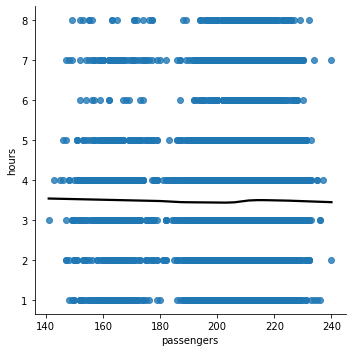

<Figure size 432x288 with 0 Axes>

In [57]:
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))
# taking a random sample from the data set.
 
sns.lmplot(x = "passengers", y = "hours", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

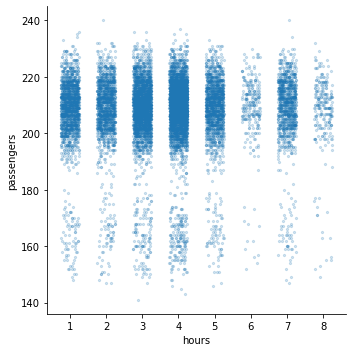

<Figure size 432x288 with 0 Axes>

In [61]:
#because of having discrete values we use jitter method.
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

#there are significantly fewer data points at 6 and 8 hours compared to the other hours. 
#there is a break in the distribution of passengers around 180

#### 7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

In [6]:
#checking unique values for week related variables
print(np.unique(flight.weekend))
print(np.unique(flight.day_of_week))

['No' 'Yes']
['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']


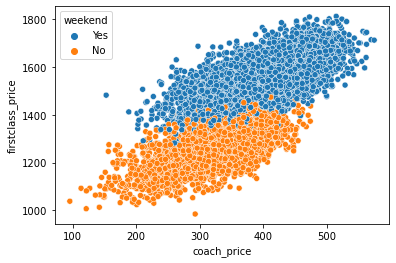

<Figure size 432x288 with 0 Axes>

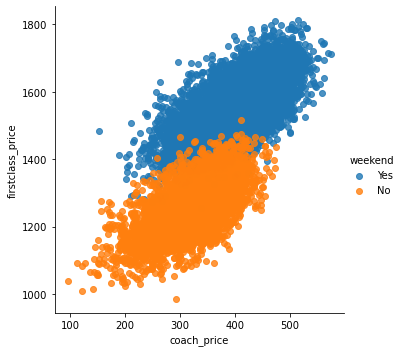

<Figure size 432x288 with 0 Axes>

In [14]:
#choose a sample and filter weekend and weekday data
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))
flight_sub_weeknd = flight_sub[flight_sub['weekend'] == 'Yes']
flight_sub_weekday = flight_sub[flight_sub['weekend'] == 'No']
 
sns.scatterplot(x = 'coach_price', y = 'firstclass_price', hue= 'weekend', data = flight_sub)
plt.show()
plt.clf()

sns.lmplot(x ='coach_price', y='firstclass_price', hue = 'weekend', data = flight_sub, fit_reg= False)
plt.show()
plt.clf()

#The scatterplot showing the relationship between coach and first-class prices doesn’t show the difference between weekend flights and weekday flights. 


#### 8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

In [16]:
#checking unique values
print(np.unique(flight.redeye))

['No' 'Yes']


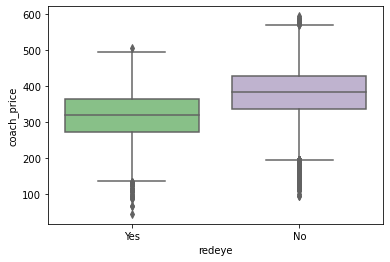

<Figure size 432x288 with 0 Axes>

In [17]:
#box plot for one quantitative and one categorical variable
sns.boxplot(x = 'redeye', y = 'coach_price', data = flight, palette = 'Accent')
plt.show()
plt.clf()

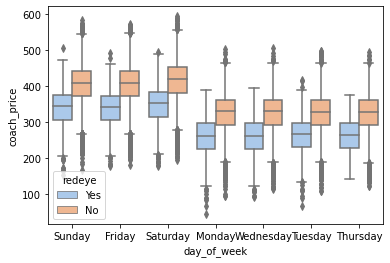

<Figure size 432x288 with 0 Axes>

In [18]:
#side-by-side box plots grouped by redeye
sns.boxplot(x = 'day_of_week', y = 'coach_price', hue = 'redeye', palette = 'pastel', data = flight)
plt.show()
plt.clf()

#We can see more clearly that the difference between redeyes and non-redeyes is pretty much the same on any day of the week, though on average weekend flights cost more than weekday flights.